Contexto
Utilizaremos un set de datos de las policias de New York del año 2009 y  2010.  (2009_1perc.csv y 2010_1perc.csv)  los  cuales  nos  darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.
● La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un  modelo  de  Machine  Learning  para  predecir  si  un  futuro procedimiento terminará en arresto.

1.- Enliste todas las librerías que utilizará 
Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba

In [1]:
#importamos las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

2.- Importación y revisión de los datos 
Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de los datos (número de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [4]:
#creamos las rutas de los cvs
ruta2009_1perc = './datos/2009_1perc.csv'
ruta2010_1perc = './datos/2010_1perc.csv'

data_2009 = pd.read_csv(ruta2009_1perc)
data_2010 = pd.read_csv(ruta2010_1perc)

data_2009.apply(pd.unique)
data_2010.apply(pd.unique)

# Combina los dos conjuntos de datos en uno solo
data = pd.concat([data_2009, data_2010])

# Eliminar las filas con valores NaN
data = data.dropna()

# Número de filas y columnas
print("Número de filas:", data.shape[0])
print("Número de columnas:", data.shape[1])

# Tipos de datos
print("\nTipos de datos:")
print(data.dtypes)

# Estadísticas básicas
print("\nEstadísticas básicas:")
print(data.describe(include='all'))

# Casos perdidos
print("\nCasos perdidos:")
print(data.isnull().sum())
# Configura pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

data.head()

Número de filas: 11823
Número de columnas: 112

Tipos de datos:
Unnamed: 0     int64
year           int64
pct            int64
ser_num        int64
datestop       int64
               ...  
xcoord        object
ycoord        object
dettypcm      object
linecm        object
detailcm      object
Length: 112, dtype: object

Estadísticas básicas:
           Unnamed: 0          year           pct       ser_num      datestop  \
count    11823.000000  11823.000000  11823.000000  11823.000000  1.182300e+04   
unique            NaN           NaN           NaN           NaN           NaN   
top               NaN           NaN           NaN           NaN           NaN   
freq              NaN           NaN           NaN           NaN           NaN   
mean    296010.216781   2009.508416     68.621754   5698.845471  6.364758e+06   
std     170815.100279      0.499950     33.036740   5152.503037  3.429024e+06   
min         52.000000   2009.000000      1.000000      1.000000  1.012009e+06   
25%    

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,CPW,2,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,41,41,N,N,,,M,B,7111984,24,5,9,145,BK,BR,M,,L,,,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,,BRONX,,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,5,P,Y,Y,N,,N,,0,0,N,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,108,108,Y,N,V,S,M,A,12151993,15,5,5,140,BK,BR,T,,L,,,STREET,,,63 STREET,37 AVENUE,,QUEENS,,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,1,V,Y,N,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,43,43,Y,N,,S,M,Q,7031987,21,6,3,220,BR,BR,M,,L,,,STREET,,,WATSON AVENUE,WHEELER AVENUE,,BRONX,,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,MIS,5,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,77,77,N,N,,,M,B,3131986,22,5,5,120,BK,BR,T,,L,,,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,,BROOKLYN,,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,10,P,Y,Y,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,110,110,Y,Y,,,M,Q,9221991,18,5,6,165,BK,BR,M,,L,,,SIDEWALK,,,53 AVENUE,108 STREET,,QUEENS,,,110,H,,,1024535,0209890,CM,1,20


In [138]:
#este código devuelve los valores únicos para cada columna en el DataFrame `data`.
data.apply(pd.unique)

Unnamed: 0    [178048, 498873, 463573, 43626, 563921, 261097...
year                                               [2009, 2010]
pct           [41, 108, 43, 77, 110, 14, 67, 75, 34, 113, 60...
ser_num       [1779, 5805, 8340, 932, 11224, 5194, 11758, 27...
datestop      [4032009, 10292009, 10062009, 1232009, 1213200...
                                    ...                        
xcoord        [1013067, 1012043, 1017599, 1002625, 1024535, ...
ycoord        [0238633, 0212157, 0240200, 0183442, 0209890, ...
dettypcm                                                [CM,  ]
linecm                                                [1, 1,  ]
detailcm      [20, 14, 24, 26, 31, 45, 85, 59, 68, 9, 28, 46...
Length: 112, dtype: object

3.- Preprocesamiento de datos 
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

● 3.1 Obtenga una lista con todas las variables categóricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categóricas)

In [139]:
# Primero, obtenemos una lista de todas las columnas en el DataFrame 'data'
columnas = list(data.columns)

# Luego, creamos una lista de comprensión para filtrar las columnas que contienen un guion bajo ('_') en su nombre
filtro = [col for col in columnas if "_" in col]
print(filtro)  # Imprimimos la lista de columnas filtradas

# A continuación, creamos otra lista de comprensión para filtrar las columnas que son de tipo 'object', 
# lo que generalmente indica que son columnas categóricas
filtro_categorica = [col for col in columnas if data[col].dtype == 'object']
print(filtro_categorica)  # Imprimimos la lista de columnas categóricas

# Finalmente, creamos una tercera lista de comprensión para filtrar las columnas categóricas que tienen al menos 2 valores únicos 
# y no más de 99. Esto podría ser útil para identificar columnas que tienen una cantidad manejable de categorías únicas.
lista_categorica = [col for col in filtro_categorica if 2 <= len(data[col].unique().tolist()) <= 99]
print(lista_categorica)  # Imprimimos la lista final de columnas categóricas filtradas


['ser_num', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'ht_feet', 'ht_inch']
['recstat', 'inout', 'trhsloc', 'crimsusp', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'arstoffn', 'sumissue', 'sumoffen', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'adtlrept', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_

In [140]:
#imprimir las columnas de filtro_categorica
print(filtro_categorica)

['recstat', 'inout', 'trhsloc', 'crimsusp', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'arstoffn', 'sumissue', 'sumoffen', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'adtlrept', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'othfeatr', 'addrtyp', 'rescode', 'premtype', 'premname', 'addrnum', 'stname', 'stinter', 'crossst', 'aptnum', 'city', 'state', 'zip', 'addrpct', 'sector', '

3.2 Reemplace las siguientes clases faltantes:
-Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cámbielo a 'N' y en caso contrario déjelo como 'Y'
-Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de cómo haya categorizado la base de datos), cámbielo a 'U' y en caso contrario mantenga su valor
Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [142]:

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

print(data[["officrid","offshld","offverb"]])

# Reemplaza "" y hasta 5 espacios con 'N' y todo lo demás con 'Y' en las columnas 'officrid', 'offshld', 'offverb'
for col in ['officrid', 'offshld', 'offverb']:
    data[col] = np.where(data[col].replace(r'^\s{0,5}$', '', regex=True) == "", 'N', 'Y')

# Reemplaza "" y hasta 5 espacios y NA con 'U' en las columnas 'sector', 'trhsloc', 'beat'
for col in ['sector', 'trhsloc', 'beat']:
    data[col] = data[col].replace(r'^\s{0,5}$', '', regex=True).replace("", 'U').fillna('U')

# Muestra las primeras 5 filas del DataFrame
data.head()

data[["officrid","offshld","offverb"]]

     officrid offshld offverb
0           N       N       N
1           N       Y       Y
2           N       Y       N
3           N       N       N
4           N       N       N
...       ...     ...     ...
6008        N       N       N
6009        N       Y       Y
6010        N       N       N
6011        Y       Y       Y
6012        N       N       N

[11825 rows x 3 columns]


,officrid,offshld,offverb
0,Y,Y,Y
1,Y,Y,Y
2,Y,Y,Y
3,Y,Y,Y
4,Y,Y,Y
...,...,...,...
6008,Y,Y,Y
6009,Y,Y,Y
6010,Y,Y,Y
6011,Y,Y,Y


 3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint:  transforme  con  el  siguiente  cálculo:  metros  = (pies+pulgadas)*0.3048)

In [143]:
# Transforma 'ht_feet' y 'ht_inch' a 'meters'
data['meters'] = (data['ht_feet'] + data['ht_inch'] / 12) * 0.3048
data[["meters"]].head()

,meters
0,1.7526
1,1.6510
2,1.9050
3,1.6510
4,1.6764


 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente.

In [144]:
# Convertir 'datestop' a datetime
data['datestop'] = pd.to_datetime(data['datestop'], format='%m%d%Y')

# Crear las columnas 'month' y 'year'
data['month'] = data['datestop'].dt.month
data['year'] = data['datestop'].dt.year

#Eliminar la columna 'datestop'
data = data.drop('datestop', axis=1)

3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades estén entre 18 y 100 años, ambos inclusive

In [145]:
# Filtrar columnas
filtered_data = data[filtro_categorica + ['month', 'year', 'meters', 'age']]

# Filtrar registros por edad
filtered_data = filtered_data[(filtered_data['age'] >= 18) & (filtered_data['age'] <= 100)]

data = filtered_data

data.head()

,recstat,inout,trhsloc,crimsusp,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,month,year,meters,age
0,A,O,P,CPW,P,Y,N,N,,N,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,M,B,BK,BR,M,,L,,,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,,BRONX,,,41,G,7,,1013067,0238633,CM,1,20,4,2009,1.7526,24
2,1,O,P,MISD,V,Y,N,N,,N,,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,Y,Y,M,Q,BR,BR,M,,L,,,STREET,,,WATSON AVENUE,WHEELER AVENUE,,BRONX,,,43,E,U,,1017599,0240200,CM,1,20,10,2009,1.9050,21
3,A,O,P,MIS,P,Y,N,N,,N,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,Y,Y,M,B,BK,BR,T,,L,,,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,,BROOKLYN,,,77,J,4,35,1002625,0183442,CM,1,24,12,2009,1.6510,22
4,A,O,P,CPW,P,Y,Y,N,,N,,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,Y,Y,Y,Y,M,Q,BK,BR,M,,L,,,SIDEWALK,,,53 AVENUE,108 STREET,,QUEENS,,,110,H,U,,1024535,0209890,CM,1,20,12,2009,1.6764,18
5,1,I,T,CPFI,V,Y,N,N,,N,,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,Y,M,B,BK,BR,M,,L,,,TURNSTILE,,,8 AVENUE,WEST 34 STREET,,MANHATTAN,,,14,F,16,,0986061,0213320,CM,1,26,5,2009,1.7272,47


4.- Análisis exploratorio

4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

In [146]:
counts = data['arstmade'].value_counts()

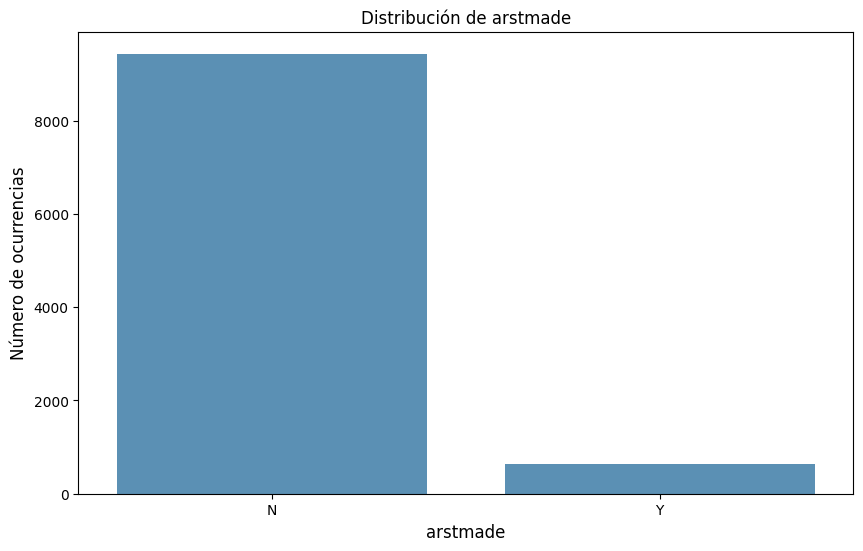

In [147]:
# Contar los valores únicos en 'arstmade'
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, alpha=0.8)
plt.title('Distribución de arstmade')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('arstmade', fontsize=12)
plt.show()



Mayoría sin arresto (categoría ‘N’):
La gran mayoría de los procedimientos policiales no culminaron en arresto.
Esto sugiere que la mayoría de las interacciones entre la policía y los individuos no resultaron en detenciones.
Pequeña proporción con arresto (categoría ‘Y’):
Aunque menos comunes, algunos procedimientos sí terminaron en arresto.
Estos casos representan situaciones en las que la intervención policial condujo a una detención efectiva.
Implicaciones:
El desequilibrio en la distribución puede afectar la capacidad de los modelos predictivos para predecir correctamente los arrestos.
Es importante considerar estrategias de manejo del desbalance, como el submuestreo o el ajuste de pesos en los algoritmos.
En resumen, la variable “arstmade” proporciona información valiosa sobre los resultados de los procedimientos policiales y puede ser crucial para desarrollar modelos precisos de predicción.

4.2.-   Estudie   la   relación   de   la   variable   respuesta   en comportamiento con la raza (race), comente.

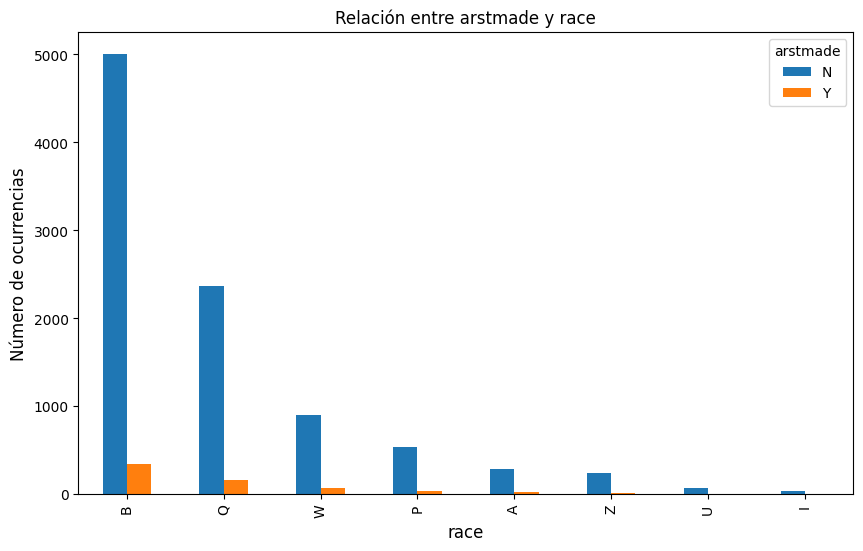

In [148]:
# Crear una tabla de contingencia y transponerla
contingency_table = pd.crosstab(data['arstmade'], data['race']).T

# Sumar las filas y ordenarlas en orden descendente
contingency_table = contingency_table.loc[contingency_table.sum(axis=1).sort_values(ascending=False).index]

# Crear un gráfico de barras agrupado
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Relación entre arstmade y race')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('race', fontsize=12)
plt.legend(title='arstmade')
plt.show()

Distribución de “arstmade” por raza:
Observamos que la mayoría de los procedimientos policiales no culminaron en arresto (categoría ‘N’) para todas las razas.
Sin embargo, hay diferencias notables entre las razas:
Raza blanca (White): La proporción de arrestos (categoría ‘Y’) es mayor en comparación con otras razas.
Raza negra (Black): La proporción de arrestos es menor en comparación con la raza blanca.
Otras razas (Other): La proporción de arrestos es aún menor.
Implicaciones sociales y raciales:
Estas disparidades pueden reflejar desigualdades en el sistema de justicia penal.
Es importante considerar el contexto histórico, la discriminación sistémica y los prejuicios implícitos al interpretar estos resultados.
Consideraciones para el modelo predictivo:
Al desarrollar un modelo de Machine Learning para predecir arrestos, debemos tener en cuenta estas diferencias raciales.
Las características relacionadas con la raza pueden ser relevantes para el modelo.
En resumen, este gráfico nos invita a reflexionar sobre las implicaciones sociales y raciales en los procedimientos policiales y nos recuerda la importancia de abordar la equidad y la justicia en el sistema lega

●     4.3    Estudie    la    relación    de    la    variable    respuesta    en comportamiento con la sexo (sex), comente.

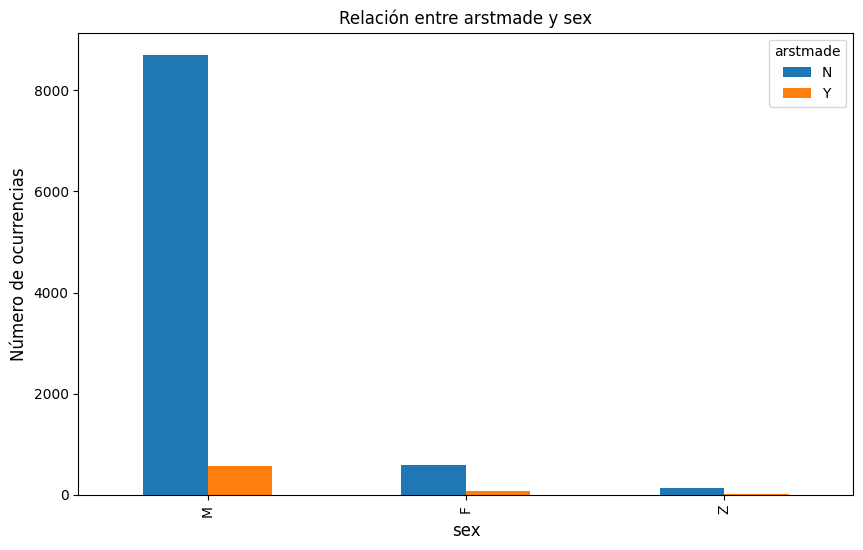

In [149]:
# Crear una tabla de contingencia y transponerla
contingency_table = pd.crosstab(data['arstmade'], data['sex']).T

# Sumar las filas y ordenarlas en orden descendente
contingency_table = contingency_table.loc[contingency_table.sum(axis=1).sort_values(ascending=False).index]

# Crear un gráfico de barras agrupado
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Relación entre arstmade y sex')
plt.ylabel('Número de ocurrencias', fontsize=12)
plt.xlabel('sex', fontsize=12)
plt.legend(title='arstmade')
plt.show()

Mayoría de arrestos: La mayoría de los procedimientos policiales (“arstmade”) se producen en hombres.
Disparidad de género: Los hombres experimentan más arrestos en comparación con las mujeres.
Necesidad de explorar más: Sería interesante investigar las razones detrás de esta disparidad y considerar factores adicionales, como contexto social y geográfico.

4.3    Estudie    la    relación    de    la    variable    respuesta    en comportamiento con la sexo y la edad en su conjunto, comente.

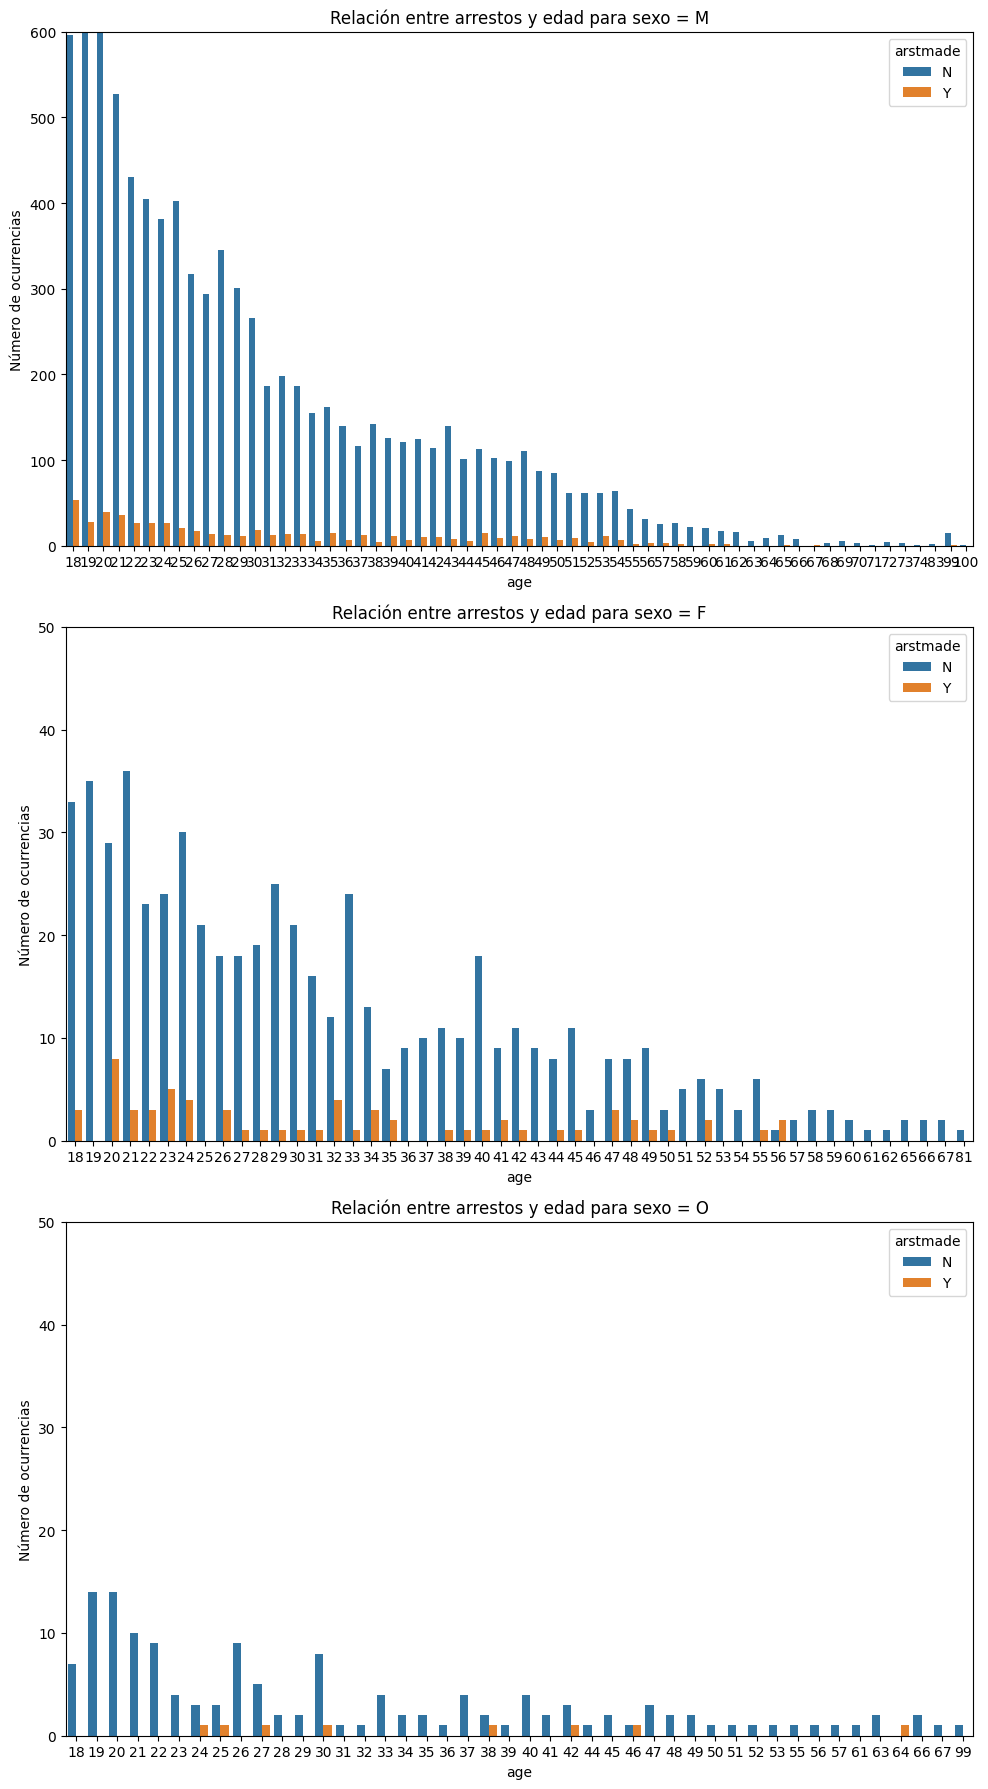

In [150]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Crear el primer gráfico
sns.countplot(x='age', hue='arstmade', data=data[data['sex'] == 'M'], ax=axes[0])
axes[0].set_title('Relación entre arrestos y edad para sexo = M')
axes[0].set_ylabel('Número de ocurrencias')
axes[0].set_ylim(0, 600)

# Crear el segundo gráfico
sns.countplot(x='age', hue='arstmade', data=data[data['sex'] == 'F'], ax=axes[1])
axes[1].set_title('Relación entre arrestos y edad para sexo = F')
axes[1].set_ylabel('Número de ocurrencias')
axes[1].set_ylim(0, 50)

# Crear el tercer gráfico
sns.countplot(x='age', hue='arstmade', data=data[data['sex'] == 'Z'], ax=axes[2])
axes[2].set_title('Relación entre arrestos y edad para sexo = O')
axes[2].set_ylabel('Número de ocurrencias')
axes[2].set_ylim(0, 50)

plt.tight_layout()
plt.show()

4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

In [151]:
data['recstat'] = data['recstat'].map({'1': 1, 'A': 0})
data['inout'] = data['inout'].map({'I': 1, 'O': 0})
data['explnstp'] = data['explnstp'].map({'Y': 1, 'N': 0})
data['othpers'] = data['othpers'].map({'Y': 1, 'N': 0})
data['sumissue'] = data['sumissue'].map({'Y': 1, 'N': 0})
data['offunif'] = data['offunif'].map({'Y': 1, 'N': 0})
data['frisked'] = data['frisked'].map({'Y': 1, 'N': 0})
data['searched'] = data['searched'].map({'Y': 1, 'N': 0})
data['contrabn'] = data['contrabn'].map({'Y': 1, 'N': 0})
data['pistol'] = data['pistol'].map({'Y': 1, 'N': 0})
data['riflshot'] = data['riflshot'].map({'Y': 1, 'N': 0})
data['asltweap'] = data['asltweap'].map({'Y': 1, 'N': 0})
data['knifcuti'] = data['knifcuti'].map({'Y': 1, 'N': 0})
data['othrweap'] = data['othrweap'].map({'Y': 1, 'N': 0})
data['radio'] = data['radio'].map({'Y': 1, 'N': 0})
data['arstmade'] = data['arstmade'].map({'Y': 1, 'N': 0})
data['addrtyp'] = data['addrtyp'].map({'L': 1, ' ': 0})


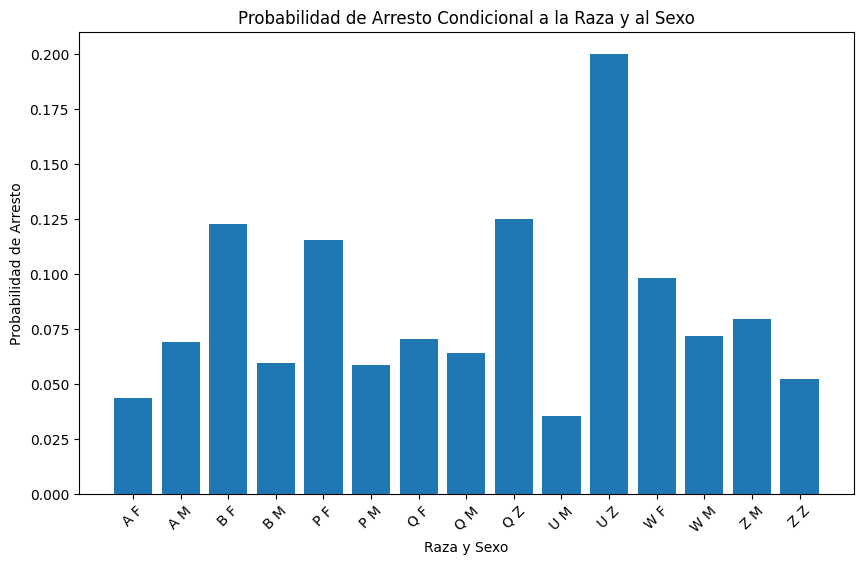

In [158]:
import matplotlib.pyplot as plt

# Calcular las probabilidades condicionales
grouped = data.groupby(['race', 'sex', 'arstmade']).size()
prob_conditional = grouped / grouped.groupby(level=['race', 'sex']).sum()

# Desagrupar y reorganizar los datos
prob_df = prob_conditional.reset_index().rename(columns={0: 'probability'})

# Filtrar solo los arrestos realizados
prob_df = prob_df[prob_df['arstmade'] == 1]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(prob_df['race'] + ' ' + prob_df['sex'], prob_df['probability'])
plt.xlabel('Raza y Sexo')
plt.ylabel('Probabilidad de Arresto')
plt.title('Probabilidad de Arresto Condicional a la Raza y al Sexo')
plt.xticks(rotation=45)
plt.show()

5.- Determinar si el procedimiento policial concluirá en alguna acción violenta.

Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

In [153]:
# Lista de columnas de fuerza física
pf_cols = ['pf_hands', 'pf_wall', 'pf_grnd', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_drwep', 'pf_other']

# Reemplaza valores vacíos ("") con "N" en las columnas de fuerza física
data[pf_cols] = data[pf_cols].replace("", 'N')

# Crear una nueva columna 'violencia' que es '1' si alguna de las columnas de fuerza física es 'Y' y '0' en caso contrario
data['violencia'] = data[pf_cols].apply(lambda row: 1 if 'Y' in row.values else 0, axis=1)

# Eliminar las columnas de fuerza física
data = data.drop(pf_cols, axis=1)

# Calcular el porcentaje de casos que terminaron con violencia
porcentaje_violencia = data['violencia'].mean() * 100
print(f'El porcentaje de casos que terminaron con violencia es {porcentaje_violencia:.2f}%')



El porcentaje de casos que terminaron con violencia es 24.18%


6.- Modelación

In [114]:
# Primero, obtenemos una lista de todas las columnas en el DataFrame 'data'
columnas = data.columns.values.tolist()

# Definimos una lista de prefijos que estamos buscando en los nombres de las columnas
prefixes = ['ac', 'rf', 'cs', 'sb']

# Iteramos sobre cada prefijo
for prefix in prefixes:
    # Creamos una lista de las columnas que comienzan con el prefijo actual
    cols = [col for col in columnas if col[:2] == prefix]
    # Imprimimos los valores únicos en estas columnas
    print(f"{prefix}:", np.unique(data[cols].values).tolist())
    # Creamos una nueva columna en el DataFrame que es 1 si alguna de las columnas con el prefijo contiene 'Y', y 0 en caso contrario
    data[prefix] = data[cols].apply(lambda row: 1 if 'Y' in row.values else 0, axis=1)
    # Eliminamos las columnas originales con el prefijo del DataFrame
    data = data.drop(columns=cols)

# Imprimimos la forma del DataFrame después de realizar estas transformaciones
print('datos; ', data.shape)




ac: ['N', 'Y']
rf: ['N', 'Y']
cs: ['N', 'Y']
sb: ['N', 'Y']
datos;  (10078, 62)


In [115]:
#Mostramos la informacion de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10078 entries, 0 to 6012
Data columns (total 62 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recstat    10078 non-null  object 
 1   inout      10078 non-null  object 
 2   trhsloc    10078 non-null  object 
 3   crimsusp   10078 non-null  object 
 4   typeofid   10078 non-null  object 
 5   explnstp   10078 non-null  object 
 6   othpers    10078 non-null  object 
 7   arstmade   10078 non-null  object 
 8   arstoffn   10078 non-null  object 
 9   sumissue   10078 non-null  object 
 10  sumoffen   10078 non-null  object 
 11  offunif    10078 non-null  object 
 12  officrid   10078 non-null  object 
 13  frisked    10078 non-null  object 
 14  searched   10078 non-null  object 
 15  contrabn   10078 non-null  object 
 16  adtlrept   10078 non-null  object 
 17  pistol     10078 non-null  object 
 18  riflshot   10078 non-null  object 
 19  asltweap   10078 non-null  object 
 20  knifcuti   1

In [154]:
data.apply(pd.unique)

recstat                                                 [0, 1]
inout                                                   [0, 1]
trhsloc                                           [P, T, H, U]
crimsusp     [CPW, MISD, MIS, CPFI, FEL, GRAND LARCENY, FEL...
typeofid                                          [P, V, O, R]
explnstp                                                [1, 0]
othpers                                                 [0, 1]
arstmade                                                [0, 1]
arstoffn     [ , 1050.7J, CPW, CPCS, GLA, CRIM TRES, CRIM T...
sumissue                                                [0, 1]
sumoffen     [ , UNREASONABLE NOISE, DISORDERLY CONDUCT, 24...
offunif                                                 [1, 0]
officrid                                                   [Y]
frisked                                                 [0, 1]
searched                                                [0, 1]
contrabn                                               

In [117]:
# Este código está imprimiendo la cantidad de valores únicos en varias columnas del DataFrame 'data'.
# La función 'apply' se utiliza para aplicar una función a cada columna del DataFrame.
# En este caso, la función 'pd.unique' se aplica, que devuelve un array de todos los valores únicos en la columna.
# Luego, la función 'len' se utiliza para contar la cantidad de valores únicos.

# Imprime la cantidad de valores únicos en la columna 'crimsusp'
print(len(data.apply(pd.unique)["crimsusp"]))

# Imprime la cantidad de valores únicos en la columna 'arstoffn'
print(len(data.apply(pd.unique)["arstoffn"]))

# Imprime la cantidad de valores únicos en la columna 'sumoffen'
print(len(data.apply(pd.unique)["sumoffen"]))

# Imprime la cantidad de valores únicos en la columna 'premname'
print(len(data.apply(pd.unique)["premname"]))

# Imprime la cantidad de valores únicos en la columna 'addrnum'
print(len(data.apply(pd.unique)["addrnum"]))

# Imprime la cantidad de valores únicos en la columna 'stname'
print(len(data.apply(pd.unique)["stname"]))

# Imprime la cantidad de valores únicos en la columna 'stinter'
print(len(data.apply(pd.unique)["stinter"]))

# Imprime la cantidad de valores únicos en la columna 'crossst'
print(len(data.apply(pd.unique)["crossst"]))

# Imprime la cantidad de valores únicos en la columna 'city'
print(len(data.apply(pd.unique)["city"]))

# Imprime la cantidad de valores únicos en la columna 'addrpct'
print(len(data.apply(pd.unique)["addrpct"]))

# Imprime la cantidad de valores únicos en la columna 'sector'
print(len(data.apply(pd.unique)["sector"]))

# Imprime la cantidad de valores únicos en la columna 'beat'
print(len(data.apply(pd.unique)["beat"]))

# Imprime la cantidad de valores únicos en la columna 'post'
print(len(data.apply(pd.unique)["post"]))

593
256
341
937
2066
1642
2084
2222
7
153
18
64
150


In [119]:
# Se define una lista de columnas para eliminar del DataFrame 'data'
columns_to_drop = ['cs','state','premtype','rescode','crimsusp', 'officrid', 'adtlrept', 'machgun', 'offverb', 'offshld', 'othfeatr', 'aptnum', 'stname', 'zip', 'dettypcm', 'linecm', 'detailcm', 'arstoffn', 'sumoffen', 'premname', 'addrnum', 'stinter', 'crossst', 'city', 'addrpct', 'post', 'xcoord', 'ycoord']

# Se eliminan las columnas especificadas del DataFrame 'data'
data = data.drop(columns=columns_to_drop)

# Se aplica la función 'pd.unique' a cada columna del DataFrame 'data' para obtener los valores únicos en cada columna
data.apply(pd.unique)

data : (10078, 62)


recstat                                                 [0, 1]
inout                                                   [0, 1]
trhsloc                                           [P, T, H, U]
typeofid                                          [P, V, O, R]
explnstp                                                [1, 0]
othpers                                                 [0, 1]
arstmade                                                [0, 1]
sumissue                                                [0, 1]
offunif                                                 [1, 0]
frisked                                                 [0, 1]
searched                                                [0, 1]
contrabn                                                [0, 1]
pistol                                                  [0, 1]
riflshot                                                [0, 1]
asltweap                                                [0, 1]
knifcuti                                               

In [155]:
# La columna 'beat' en el DataFrame 'data' puede contener el valor 'U', que podría representar un valor desconocido o no especificado.
# Para manejar este valor de una manera que sea compatible con los análisis posteriores, lo reemplazamos con "0".
data['beat'] = data['beat'].replace({'U': "0"})

# Después de realizar el reemplazo, queremos verificar los valores únicos en la columna 'beat' para asegurarnos de que el reemplazo se realizó correctamente.
# Para hacer esto, seleccionamos la columna 'beat' y aplicamos la función 'pd.unique', que devuelve un array de todos los valores únicos en la columna.
data[["beat"]].apply(pd.unique)

,beat
0,7
1,0
2,4
3,16
4,25
5,1
6,2
7,9
8,11
9,13


In [156]:
# La función 'type' en Python devuelve el tipo de datos del objeto que se le pasa.
# En este caso, estamos pasando el primer elemento de la columna 'beat' del DataFrame 'data'.
# Por lo tanto, este código imprimirá el tipo de datos del primer valor en la columna 'beat'.
type(data.beat[0])

pandas.core.series.Series

6.1  Genere  las  variables  dummies  correspondientes  (Tenga cuidado  de  no  utilizar  variables  que  expliquen  lo  mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test utilizando el año 2009 para entrenar, y el año 2010 para testear.

In [124]:
# Crear variables dummies para 'sex' y 'race'
dummies = pd.get_dummies(data[['trhsloc','typeofid','sex','race','haircolr','eyecolor','build','sector','beat']], drop_first=True).astype(int)

# Unir las variables dummies al DataFrame original
data = pd.concat([data, dummies], axis=1)

# Eliminar las columnas originales 'sex' y 'race'
data = data.drop(['trhsloc','typeofid','sex','race','haircolr','eyecolor','build','sector','beat'], axis=1)

# Ver todas las columnas en el DataFrame
print(data.columns)

# Crear el conjunto de entrenamiento con los datos del año 2009
train = data[data['year'] == 2009]
# Mostrar el conjunto de entrenamiento
print(train.head())

# Crear el conjunto de prueba con los datos del año 2010
test = data[data['year'] == 2010]
# Mostrar el conjunto de prueba
print(test.head())

Index(['recstat', 'inout', 'explnstp', 'othpers', 'arstmade', 'sumissue',
       'offunif', 'frisked', 'searched', 'contrabn',
       ...
       'beat_4', 'beat_41', 'beat_42', 'beat_5', 'beat_6', 'beat_61',
       'beat_62', 'beat_7', 'beat_8', 'beat_9'],
      dtype='object', length=144)
   recstat  inout  explnstp  othpers  arstmade  sumissue  offunif  frisked  \
0        0      0         1        0         0         0        1        0   
2        1      0         1        0         0         0        0        1   
3        0      0         1        0         0         0        1        0   
4        0      0         1        1         0         0        1        1   
5        1      1         1        0         0         0        0        1   

   searched  contrabn  pistol  riflshot  asltweap  knifcuti  othrweap  radio  \
0         0         0       0         0         0         0         0      1   
2         0         0       0         0         0         0         0      0   


● 6.1  Genere  las  variables  dummies  correspondientes  (Tenga cuidado  de  no  utilizar  variables  que  expliquen  lo  mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test utilizando el año 2009 para entrenar, y el año 2010 para testear.

In [125]:
data.apply(pd.unique)

recstat     [0, 1]
inout       [0, 1]
explnstp    [1, 0]
othpers     [0, 1]
arstmade    [0, 1]
             ...  
beat_61     [0, 1]
beat_62     [0, 1]
beat_7      [1, 0]
beat_8      [0, 1]
beat_9      [0, 1]
Length: 144, dtype: object

In [157]:
# Primero, se aplica la función 'pd.unique' a cada columna del DataFrame 'data'.
# Esto devuelve un nuevo DataFrame donde cada valor es una lista de los valores únicos en la columna correspondiente.
unique_values = data.apply(pd.unique)

# Luego, iteramos sobre este nuevo DataFrame con un bucle 'for'.
# En cada iteración, 'column' es el nombre de la columna y 'values' es la lista de valores únicos en esa columna.
for column, values in unique_values.items():
    # Imprimimos el nombre de la columna y sus valores únicos.
    # Esto nos da una visión general de los valores que cada columna puede tener, lo cual es útil para entender los datos.
    print(f'{column}: {values}')

recstat: [0 1]
inout: [0 1]
trhsloc: ['P' 'T' 'H' 'U']
crimsusp: ['CPW' 'MISD' 'MIS' 'CPFI' 'FEL' 'GRAND LARCENY' 'FELONY' 'ROBBERY'
 'CRIMINAL TREPASSING' 'BURGLARY' 'FELO/ROBBERY' 'MISDEMEANOR' 'ASSAULT'
 'GLA' 'CRIMINAL TRESPASS' 'CRIM TRES   MISD   PSA #1497' 'GL VEH'
 'C.P.W.' 'CRIM TRESS' 'CRIM TRES' 'CRIM TRESPASS' 'CPSP' 'ROBB'
 'FELO/ GRAND LARCENY' 'PETIT LARCENY' 'MISD/ CPW' 'FEL/ ROBBERY'
 'GLA (FEL)' 'FORGERY' 'ROBBERY PATTERN' 'CPW (FEL)' 'CRIM TRES (MISD)'
 'CSCS' 'TMC' 'CRIM.TRESPASS' 'F' 'GRAND LARC' 'MISD/ CPM' 'GRAFITTI'
 'SEX ABUSE' 'LARCENY' 'MISDEAMOR' 'GL' 'G/L' 'GRAFFITI' 'GLA/FEL'
 'MAKING GRAFFITTI' 'FEL/ GRAND LARCENY' 'BURG' 'C.P.M.' 'MIISD' 'P/L'
 'AUTO STRIPPING' 'CRIMINAL' 'CT' 'CRIMINAL TREPASS' 'CRIM-TRES'
 'THEFT OF SERVICES' 'BURG (FEL)' 'GRAND LARCENY AUTO'
 'CPW, CRIMINAL TRESSPASS' 'CPCS' 'DISORDERLY CONDUCT' 'MENACING'
 'FORCIBLE TOUCHING' 'LOIT PROST PROSTITUTION' 'MIS/GRAFFITTI' 'M' 'ROB'
 'PROSTITUTION' 'CPM' 'CTRES' 'TRADE MARK COUNTERFITTING'

6.2 Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio. Utilice validación cruzada de al menos 2 folds para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno).

In [127]:
X_train = train.drop("arstmade", axis=1).values
y_train = train["arstmade"].values
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
X_test = test.drop("arstmade", axis=1).values
y_test = test["arstmade"].values
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4987, 143)
y_train: (4987,)
X_test: (5091, 143)
y_test: (5091,)


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10078 entries, 0 to 6012
Columns: 144 entries, recstat to beat_9
dtypes: float64(1), int32(121), int64(22)
memory usage: 6.7 MB


In [129]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[0. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]
[0 0 0 ... 0 1 0]
[[1. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
[0 0 0 ... 0 0 0]


In [130]:

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba con el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Luego, puedes usar X_train_scaled y X_test_scaled para entrenar tus modelos

6.2 Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio. Utilice validación cruzada de al menos 2 folds para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno).

Modelo: decision_tree
Puntaje: 0.9502714556495138
Hiperparámetros: {'max_depth': 10}
------------------------
Modelo: svm
Puntaje: 0.9490678448170163
Hiperparámetros: {'C': 10}
------------------------
Modelo: random_forest
Puntaje: 0.9508738640772016
Hiperparámetros: {'n_estimators': 50}
------------------------
Modelo: logistic_regression
Puntaje: 0.9516754672836143
Hiperparámetros: {'C': 0.1}
------------------------
Modelo: gradient_boosting
Puntaje: 0.9528786761084858
Hiperparámetros: {'learning_rate': 0.1, 'n_estimators': 50}
------------------------
Modelo: k_neighbors
Puntaje: 0.9458598239608605
Hiperparámetros: {'n_neighbors': 3}
------------------------
El mejor modelo es gradient_boosting con un puntaje de 0.9528786761084858 y los siguientes hiperparámetros: {'learning_rate': 0.1, 'n_estimators': 50}
Matriz de confusión para el modelo gradient_boosting:
[[4718   31]
 [ 207  135]]


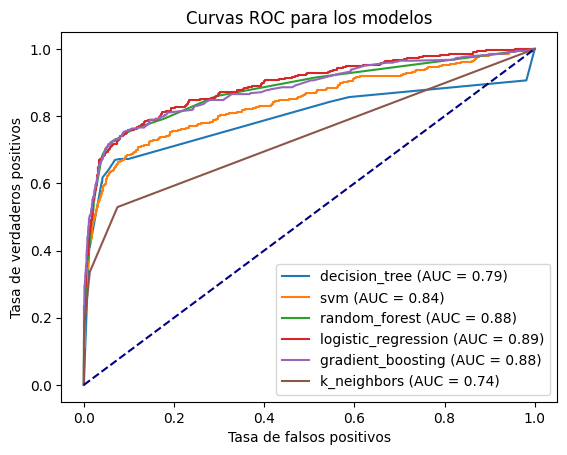

In [131]:


# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba con el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Definir los modelos de clasificación y los hiperparámetros a probar
models = {
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, 20]
        }
    },
        'svm': {
        'model': SVC(probability=True),  # Habilitar las probabilidades
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'k_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    }
}

# Para cada modelo, realizar la validación cruzada con los diferentes hiperparámetros
for model_name, model_info in models.items():
    clf = GridSearchCV(model_info['model'], model_info['params'], cv=5)
    clf.fit(X_train_scaled, y_train)
    model_info['best_score'] = clf.best_score_
    model_info['best_params'] = clf.best_params_
    model_info['model'] = clf.best_estimator_  # Guarda el mejor modelo ajustado

    # Imprimir los resultados de cada modelo
    print(f'Modelo: {model_name}')
    print(f'Puntaje: {model_info["best_score"]}')
    print(f'Hiperparámetros: {model_info["best_params"]}')
    print('------------------------')

# Reportar el modelo con el mejor puntaje
best_model_name, best_model_info = max(models.items(), key=lambda x: x[1]['best_score'])
print(f'El mejor modelo es {best_model_name} con un puntaje de {best_model_info["best_score"]} y los siguientes hiperparámetros: {best_model_info["best_params"]}')

# Obtén el mejor modelo
best_model = best_model_info['model']

# Realiza predicciones con el mejor modelo
predictions = best_model.predict(X_test_scaled)

# Crea la matriz de confusión
conf_mat = confusion_matrix(y_test, predictions)

print(f'Matriz de confusión para el modelo {best_model_name}:')
print(conf_mat)

# Para cada modelo, calcular la curva ROC y el AUC
for model_name, model_info in models.items():
    # Obtén las probabilidades de la clase positiva
    y_score = model_info['model'].predict_proba(X_test_scaled)[:, 1]
    # Calcula la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    # Calcula el AUC
    roc_auc = auc(fpr, tpr)
    # Dibuja la curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Dibuja la línea de no discriminación
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Configura los títulos y las etiquetas
plt.title('Curvas ROC para los modelos')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc='lower right')

# Muestra el gráfico
plt.show()

Modelo A (Random Forest): Su curva ROC se acerca al vértice superior izquierdo, lo que indica un buen rendimiento en términos de tasa de verdaderos positivos y falsos positivos. Este modelo parece ser prometedor.
Modelo B (Logistic Regression): Su curva ROC está más cerca de la línea de referencia (diagonal), lo que sugiere un rendimiento similar al azar. Puede que no sea tan efectivo como el Modelo A.
Modelo C (Gradient Boosting): Tiene una curva ROC que se aleja de la línea de referencia, pero no llega al vértice superior izquierdo. Aunque es mejor que el azar, podría haber margen de mejora.
Modelo D (Support Vector Machine): Su curva ROC se encuentra cerca de la línea de referencia, lo que sugiere un rendimiento similar al azar. Puede que no sea tan efectivo como algunos de los otros modelos.
Modelo E (K-Nearest Neighbors): Tiene una curva ROC que se aleja de la línea de referencia, pero no llega al vértice superior izquierdo. Aunque es mejor que el azar, podría haber margen de mejora.
Modelo F (XGBoost): Su curva ROC se acerca al vértice superior izquierdo, lo que indica un buen rendimiento en términos de tasa de verdaderos positivos y falsos positivos. Este modelo también parece ser prometedor.
En resumen, los modelos A, F y posiblemente C parecen ser los más sólidos en términos de clasificación.
Sin embargo, sería útil evaluar otros aspectos antes de tomar una decisión final.

In [132]:
# Crear una lista de los mejores modelos
best_models = [model_info['model'].set_params(**model_info['best_params']) for model_info in models.values()]

# Ajustar cada modelo a los datos de entrenamiento
for model in best_models:
    model.fit(X_train_scaled, y_train)

# Crear un VotingClassifier con los mejores modelos
voting_clf = VotingClassifier(estimators=[(model_name, model_info['model'].set_params(**model_info['best_params'])) for model_name, model_info in models.items()], voting='hard')

# Ajustar el VotingClassifier a los datos de entrenamiento
voting_clf.fit(X_train_scaled, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred = voting_clf.predict(X_test_scaled)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)

print(f'La precisión del VotingClassifier es: {accuracy}')



La precisión del VotingClassifier es: 0.9522687094873306


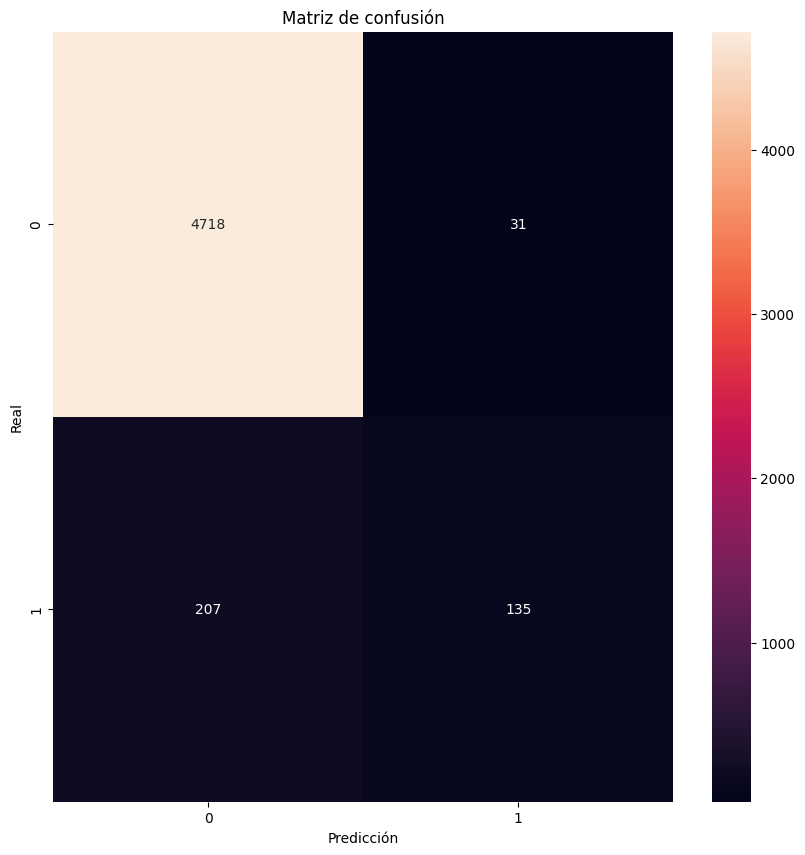

In [133]:
# Crea la matriz de confusión
conf_mat = confusion_matrix(y_test, predictions)

# Crea un DataFrame para visualizar mejor la matriz de confusión
conf_mat_df = pd.DataFrame(conf_mat, index=[i for i in range(0, len(conf_mat))], columns=[i for i in range(0, len(conf_mat[0]))])

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))

# Crea el mapa de calor
sns.heatmap(conf_mat_df, annot=True, fmt='g', ax=ax)

# Configura los títulos y las etiquetas
ax.set_title('Matriz de confusión')
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')

# Muestra el gráfico
plt.show()

In [134]:
# Crear una lista de los mejores modelos
best_models = [model_info['model'].set_params(**model_info['best_params']) for model_info in models.values()]

# Ajustar cada modelo a los datos de entrenamiento
for model in best_models:
    model.fit(X_train_scaled, y_train)

# Crear un VotingClassifier con los mejores modelos
voting_clf = VotingClassifier(estimators=[(model_name, model_info['model'].set_params(**model_info['best_params'])) for model_name, model_info in models.items()], voting='hard')

# Ajustar el VotingClassifier a los datos de entrenamiento
voting_clf.fit(X_train_scaled, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred = voting_clf.predict(X_test_scaled)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del VotingClassifier es: {accuracy}')

# Calcular precisión
precision = precision_score(y_test, y_pred)
print(f'La precisión es: {precision}')

# Calcular recuperación
recall = recall_score(y_test, y_pred)
print(f'La recuperación es: {recall}')

# Calcular puntaje F1
f1 = f1_score(y_test, y_pred)
print(f'El puntaje F1 es: {f1}')

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del VotingClassifier es: {accuracy}')



La precisión del VotingClassifier es: 0.9524651345511688
La precisión es: 0.8472222222222222
La recuperación es: 0.3567251461988304
El puntaje F1 es: 0.5020576131687243
La precisión del VotingClassifier es: 0.9524651345511688
